<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mod-4-Project---Starter-Notebook" data-toc-modified-id="Mod-4-Project---Starter-Notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mod 4 Project - Starter Notebook</a></span></li><li><span><a href="#Some-Notes-Before-Starting" data-toc-modified-id="Some-Notes-Before-Starting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Some Notes Before Starting</a></span><ul class="toc-item"><li><span><a href="#Wide-Format-vs-Long-Format" data-toc-modified-id="Wide-Format-vs-Long-Format-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Wide Format vs Long Format</a></span></li></ul></li><li><span><a href="#Helper-Functions-Provided" data-toc-modified-id="Helper-Functions-Provided-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Helper Functions Provided</a></span></li><li><span><a href="#Step-1:-Load-the-Data/Filtering-for-Chosen-Zipcodes" data-toc-modified-id="Step-1:-Load-the-Data/Filtering-for-Chosen-Zipcodes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1: Load the Data/Filtering for Chosen Zipcodes</a></span><ul class="toc-item"><li><span><a href="#No-duplicates-in-top-10-zip-codes-by-raw-and-percent-increase." data-toc-modified-id="No-duplicates-in-top-10-zip-codes-by-raw-and-percent-increase.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>No duplicates in top 10 zip codes by raw and percent increase.</a></span></li></ul></li><li><span><a href="#Step-2:-Data-Preprocessing" data-toc-modified-id="Step-2:-Data-Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 2: Data Preprocessing</a></span></li><li><span><a href="#Step-3:-EDA-and-Visualization" data-toc-modified-id="Step-3:-EDA-and-Visualization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 3: EDA and Visualization</a></span></li><li><span><a href="#Step-4:-Reshape-from-Wide-to-Long-Format" data-toc-modified-id="Step-4:-Reshape-from-Wide-to-Long-Format-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Step 4: Reshape from Wide to Long Format</a></span></li><li><span><a href="#Step-5:-SARIMA-Modeling" data-toc-modified-id="Step-5:-SARIMA-Modeling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Step 5: SARIMA Modeling</a></span><ul class="toc-item"><li><span><a href="#Parameter-Selection-for-the-ARIMA-Time-Series-Model" data-toc-modified-id="Parameter-Selection-for-the-ARIMA-Time-Series-Model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Parameter Selection for the ARIMA Time Series Model</a></span></li></ul></li><li><span><a href="#Step-6:-Interpreting-Results" data-toc-modified-id="Step-6:-Interpreting-Results-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Step 6: Interpreting Results</a></span></li></ul></div>

In [64]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [5]:
df = pd.read_csv('zillow_data.csv')
df.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [7]:
# make copy of df
df1 = df.copy()

# add column with difference between 2017 and 1996 average value
df1['Raw Difference'] = df['2017-11'] - df['1996-04']

# add column with percent change between 2017 and 1996 average value
df1['Percent Change'] = (df['2017-11'] / df['1996-04']) * 100

df1.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Raw Difference,Percent Change
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,679100.0,303.201676
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,79300.0,133.644463
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,110400.0,152.471483
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,798500.0,260.309175
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,43000.0,155.627426


In [31]:
# create new dataframe with top 10 zip codes for Raw Increase and 
# top ten zip codes for Percent Change

df_raw = df1.sort_values('Raw Difference',ascending = False)
print('Raw Difference:\n',df_raw.head(10))

print()

df_percent = df1.sort_values('Percent Change',ascending = False)
print('Percent Change:\n',df_percent.head(10))

Raw Difference:
        RegionID  RegionName           City State  \
10237     97518       94027       Atherton    CA   
4816      96086       90210  Beverly Hills    CA   
5738      97691       94301      Palo Alto    CA   
2026      97577       94123  San Francisco    CA   
21        61703       10128       New York    NY   
4723      72636       33480     Palm Beach    FL   
742       97569       94115  San Francisco    CA   
5843      97513       94022      Los Altos    CA   
7380      96149       90402   Santa Monica    CA   
9         97564       94109  San Francisco    CA   

                                Metro     CountyName  SizeRank    1996-04  \
10237                   San Francisco      San Mateo     10238  1179200.0   
4816   Los Angeles-Long Beach-Anaheim    Los Angeles      4817  1015400.0   
5738                         San Jose    Santa Clara      5739   709500.0   
2026                    San Francisco  San Francisco      2027   849100.0   
21                       

In [30]:
df_raw.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Raw Difference,Percent Change
10237,97518,94027,Atherton,CA,San Francisco,San Mateo,10238,1179200.0,1184300.0,1189700.0,...,6250200,6315400,6429100,6581800,6705000,6764600,6788400,6796500,5249900.0,545.208616
4816,96086,90210,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4817,1015400.0,1016900.0,1018400.0,...,5450400,5503000,5574100,5661000,5738200,5816100,5907800,5956700,4558700.0,548.956076
5738,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,709500.0,711900.0,715000.0,...,4319300,4401100,4481700,4544700,4595100,4668700,4762600,4818400,3772200.0,631.670190
2026,97577,94123,San Francisco,CA,San Francisco,San Francisco,2027,849100.0,859000.0,868800.0,...,4552400,4598200,4596300,4579000,4582000,4597600,4640200,4682300,3747200.0,541.314333
21,61703,10128,New York,NY,New York,New York,22,3676700.0,3704200.0,3729600.0,...,7417600,7427300,7371400,7342700,7353300,7350300,7363000,7386600,3694700.0,200.489569
4723,72636,33480,Palm Beach,FL,Miami-Fort Lauderdale,Palm Beach,4724,958400.0,958100.0,957900.0,...,4560200,4583200,4588200,4609000,4626500,4661200,4692300,4686200,3629800.0,478.735392
742,97569,94115,San Francisco,CA,San Francisco,San Francisco,743,794000.0,796500.0,799000.0,...,4145400,4172600,4171100,4147900,4136800,4137200,4148900,4160500,3377100.0,525.327456
5843,97513,94022,Los Altos,CA,San Jose,Santa Clara,5844,795600.0,798400.0,801700.0,...,3866800,3951900,4045200,4118000,4170500,4235700,4321900,4372600,3249600.0,508.446456
7380,96149,90402,Santa Monica,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,7381,880000.0,881400.0,882700.0,...,4020700,4053200,4068200,4089200,4125000,4152300,4169700,4179000,3188200.0,462.295455
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500,3027900.0,495.287206


In [33]:
df_percent.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Raw Difference,Percent Change
1155,62033,11222,New York,NY,New York,Kings,1156,149200.0,148400.0,147500.0,...,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100,1494900.0,1101.943700
117,62022,11211,New York,NY,New York,Kings,118,133200.0,132900.0,132500.0,...,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700,1307300.0,1081.456456
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700,1413600.0,1067.556468
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300,1309100.0,1054.154519
106,62026,11215,New York,NY,New York,Kings,107,225700.0,227500.0,229400.0,...,2244400,2266100,2275800,2287100,2288900,2265300,2244900,2243900,2050100.0,1008.329641
13864,62320,11975,Wainscott,NY,New York,Suffolk,13865,349500.0,352100.0,354900.0,...,3256800,3298600,3315100,3317200,3353000,3425000,3473300,3467800,2965600.0,948.526466
11728,62281,11930,Amagansett,NY,New York,Suffolk,11729,328400.0,327900.0,327100.0,...,2903800,2942600,2976300,3008500,3051700,3099000,3132200,3141100,2647900.0,906.303289
1790,96127,90291,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,1791,234300.0,234200.0,234200.0,...,2043700,2056400,2046300,2028900,2039400,2058500,2064200,2056800,1812000.0,873.367478
258,66125,20001,Washington,DC,Washington,District of Columbia,259,92000.0,92600.0,93200.0,...,771200,773300,777600,780500,781600,785500,791400,793300,685600.0,845.217391
14217,93399,80449,Hartsel,CO,Denver,Park,14218,30000.0,30400.0,30900.0,...,248000,251300,252900,254700,256600,259200,263400,267700,222900.0,843.000000


## No duplicates in top 10 zip codes by raw and percent increase.

# Step 2: Data Preprocessing

In [54]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [35]:
df_raw.shape

(14723, 274)

In [38]:
df_raw_10 = df_raw.head(10)
df_raw_10

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Raw Difference,Percent Change
10237,97518,94027,Atherton,CA,San Francisco,San Mateo,10238,1179200.0,1184300.0,1189700.0,...,6250200,6315400,6429100,6581800,6705000,6764600,6788400,6796500,5249900.0,545.208616
4816,96086,90210,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4817,1015400.0,1016900.0,1018400.0,...,5450400,5503000,5574100,5661000,5738200,5816100,5907800,5956700,4558700.0,548.956076
5738,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,709500.0,711900.0,715000.0,...,4319300,4401100,4481700,4544700,4595100,4668700,4762600,4818400,3772200.0,631.670190
2026,97577,94123,San Francisco,CA,San Francisco,San Francisco,2027,849100.0,859000.0,868800.0,...,4552400,4598200,4596300,4579000,4582000,4597600,4640200,4682300,3747200.0,541.314333
21,61703,10128,New York,NY,New York,New York,22,3676700.0,3704200.0,3729600.0,...,7417600,7427300,7371400,7342700,7353300,7350300,7363000,7386600,3694700.0,200.489569
4723,72636,33480,Palm Beach,FL,Miami-Fort Lauderdale,Palm Beach,4724,958400.0,958100.0,957900.0,...,4560200,4583200,4588200,4609000,4626500,4661200,4692300,4686200,3629800.0,478.735392
742,97569,94115,San Francisco,CA,San Francisco,San Francisco,743,794000.0,796500.0,799000.0,...,4145400,4172600,4171100,4147900,4136800,4137200,4148900,4160500,3377100.0,525.327456
5843,97513,94022,Los Altos,CA,San Jose,Santa Clara,5844,795600.0,798400.0,801700.0,...,3866800,3951900,4045200,4118000,4170500,4235700,4321900,4372600,3249600.0,508.446456
7380,96149,90402,Santa Monica,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,7381,880000.0,881400.0,882700.0,...,4020700,4053200,4068200,4089200,4125000,4152300,4169700,4179000,3188200.0,462.295455
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500,3027900.0,495.287206


In [40]:
df_percent_10 = df_percent.head(10)
df_percent_10

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Raw Difference,Percent Change
1155,62033,11222,New York,NY,New York,Kings,1156,149200.0,148400.0,147500.0,...,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100,1494900.0,1101.943700
117,62022,11211,New York,NY,New York,Kings,118,133200.0,132900.0,132500.0,...,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700,1307300.0,1081.456456
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700,1413600.0,1067.556468
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300,1309100.0,1054.154519
106,62026,11215,New York,NY,New York,Kings,107,225700.0,227500.0,229400.0,...,2244400,2266100,2275800,2287100,2288900,2265300,2244900,2243900,2050100.0,1008.329641
13864,62320,11975,Wainscott,NY,New York,Suffolk,13865,349500.0,352100.0,354900.0,...,3256800,3298600,3315100,3317200,3353000,3425000,3473300,3467800,2965600.0,948.526466
11728,62281,11930,Amagansett,NY,New York,Suffolk,11729,328400.0,327900.0,327100.0,...,2903800,2942600,2976300,3008500,3051700,3099000,3132200,3141100,2647900.0,906.303289
1790,96127,90291,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,1791,234300.0,234200.0,234200.0,...,2043700,2056400,2046300,2028900,2039400,2058500,2064200,2056800,1812000.0,873.367478
258,66125,20001,Washington,DC,Washington,District of Columbia,259,92000.0,92600.0,93200.0,...,771200,773300,777600,780500,781600,785500,791400,793300,685600.0,845.217391
14217,93399,80449,Hartsel,CO,Denver,Park,14218,30000.0,30400.0,30900.0,...,248000,251300,252900,254700,256600,259200,263400,267700,222900.0,843.000000


In [57]:
df_raw_10_clean = df_raw_10.drop(columns=['Raw Difference','Percent Change'], axis=1)
get_datetimes(df_raw_10_clean)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [58]:
df_raw_10_clean

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
10237,97518,94027,Atherton,CA,San Francisco,San Mateo,10238,1179200.0,1184300.0,1189700.0,...,6138300,6197800,6250200,6315400,6429100,6581800,6705000,6764600,6788400,6796500
4816,96086,90210,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4817,1015400.0,1016900.0,1018400.0,...,5339400,5397000,5450400,5503000,5574100,5661000,5738200,5816100,5907800,5956700
5738,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,709500.0,711900.0,715000.0,...,4188300,4247600,4319300,4401100,4481700,4544700,4595100,4668700,4762600,4818400
2026,97577,94123,San Francisco,CA,San Francisco,San Francisco,2027,849100.0,859000.0,868800.0,...,4522600,4518600,4552400,4598200,4596300,4579000,4582000,4597600,4640200,4682300
21,61703,10128,New York,NY,New York,New York,22,3676700.0,3704200.0,3729600.0,...,7410100,7422400,7417600,7427300,7371400,7342700,7353300,7350300,7363000,7386600
4723,72636,33480,Palm Beach,FL,Miami-Fort Lauderdale,Palm Beach,4724,958400.0,958100.0,957900.0,...,4506300,4526500,4560200,4583200,4588200,4609000,4626500,4661200,4692300,4686200
742,97569,94115,San Francisco,CA,San Francisco,San Francisco,743,794000.0,796500.0,799000.0,...,4157100,4140900,4145400,4172600,4171100,4147900,4136800,4137200,4148900,4160500
5843,97513,94022,Los Altos,CA,San Jose,Santa Clara,5844,795600.0,798400.0,801700.0,...,3730400,3793300,3866800,3951900,4045200,4118000,4170500,4235700,4321900,4372600
7380,96149,90402,Santa Monica,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,7381,880000.0,881400.0,882700.0,...,3958400,3982900,4020700,4053200,4068200,4089200,4125000,4152300,4169700,4179000
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


# Step 3: EDA and Visualization

In [47]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

NameError: name 'matplotlib' is not defined

# Step 4: Reshape from Wide to Long Format

In [48]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [52]:
# Experimenting with melt_data
df3 = df.copy()
df4 = melt_data(df3)

In [53]:
df4.head()

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


In [61]:
# Select Top Zip Code by Percent Increase
top_zip_percent = df[df['RegionID'] == 62033]
top_zip_percent

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1155,62033,11222,New York,NY,New York,Kings,1156,149200.0,148400.0,147500.0,...,1598000,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100


In [84]:
top_zip_percent_melted = melt_data(top_zip_percent)
print(top_zip_percent_melted.shape)
top_zip_percent_melted

(265, 1)


,value
time,
1996-04-01,149200.0
1996-05-01,148400.0
1996-06-01,147500.0
1996-07-01,146600.0
1996-08-01,146000.0
...,...
2017-12-01,1651200.0
2018-01-01,1661800.0
2018-02-01,1672800.0


# Step 5: SARIMA Modeling

In [85]:
top_zip_percent_melted.columns

Index(['value'], dtype='object')

In [86]:
top_zip_percent_melted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   265 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


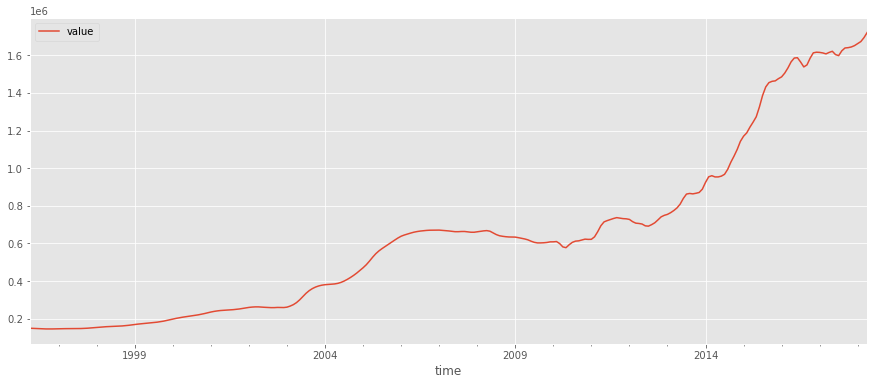

               value
time                
1996-04-01  149200.0
1996-05-01  148400.0
1996-06-01  147500.0
1996-07-01  146600.0
1996-08-01  146000.0


In [92]:
# Plot the time series
top_zip_percent_melted.plot(figsize=(15, 6))
plt.show()
print(top_zip_percent_melted.head())

## Parameter Selection for the ARIMA Time Series Model 

The first step towards fitting an ARIMA model is to find the values of `ARIMA(p,d,q)(P,D,Q)s` that produce the desired output. Selection of these parameters requires domain expertise and time.  We shall first generate small ranges of these parameters and use a "grid search" to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal ARIMA model with the `SARIMAX()` function from the `statsmodels` library and assess its overall quality. 

`SARIMAX` detailed documentation can be viewed [here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html)

Let's begin by generating example combination of parameters that we wish to use: 

- Define p, q, and d parameters to take any value from 0/1 using `range()` function. (Note: We can try larger values which can make our model computationally expensive to run, you can try this as an additional experiment) 
- Generate combinations for `(p,d,q)` using `itertools.product`  
- Similarly, generate seasonal combinations as `(p,d,q)s`. Use s = 12 (constant) 
- Print some example combinations for seasonal ARIMA  

In [89]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 1)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [95]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(top_zip_percent_melted,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =7915.493125002127


/Users/jimpetoskey/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/jimpetoskey/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [96]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 0, 0)
pdqs    (0, 0, 0, 12)
aic           7915.49
Name: 0, dtype: object

In [106]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(top_zip_percent_melted, 
                                        order=(2, 2, 2), 
                                        seasonal_order=(2, 2, 2, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

/Users/jimpetoskey/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/jimpetoskey/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7562      0.244      3.094      0.002       0.277       1.235
ar.L2         -0.3148      0.268     -1.173      0.241      -0.841       0.211
ma.L1         -0.3538      0.259     -1.366      0.172      -0.861       0.154
ma.L2         -0.4871      0.274     -1.776      0.076      -1.024       0.050
ar.S.L12      -0.6631      0.344     -1.929      0.054      -1.337       0.011
ar.S.L24      -0.4251      0.360     -1.181      0.237      -1.130       0.280
ma.S.L12      -1.1159      0.288     -3.876      0.000      -1.680      -0.552
ma.S.L24       0.2877      0.265      1.086      0.277      -0.231       0.807
sigma2      2.214e+08   3.55e-10   6.24e+17      0.000    2.21e+08    2.21e+08


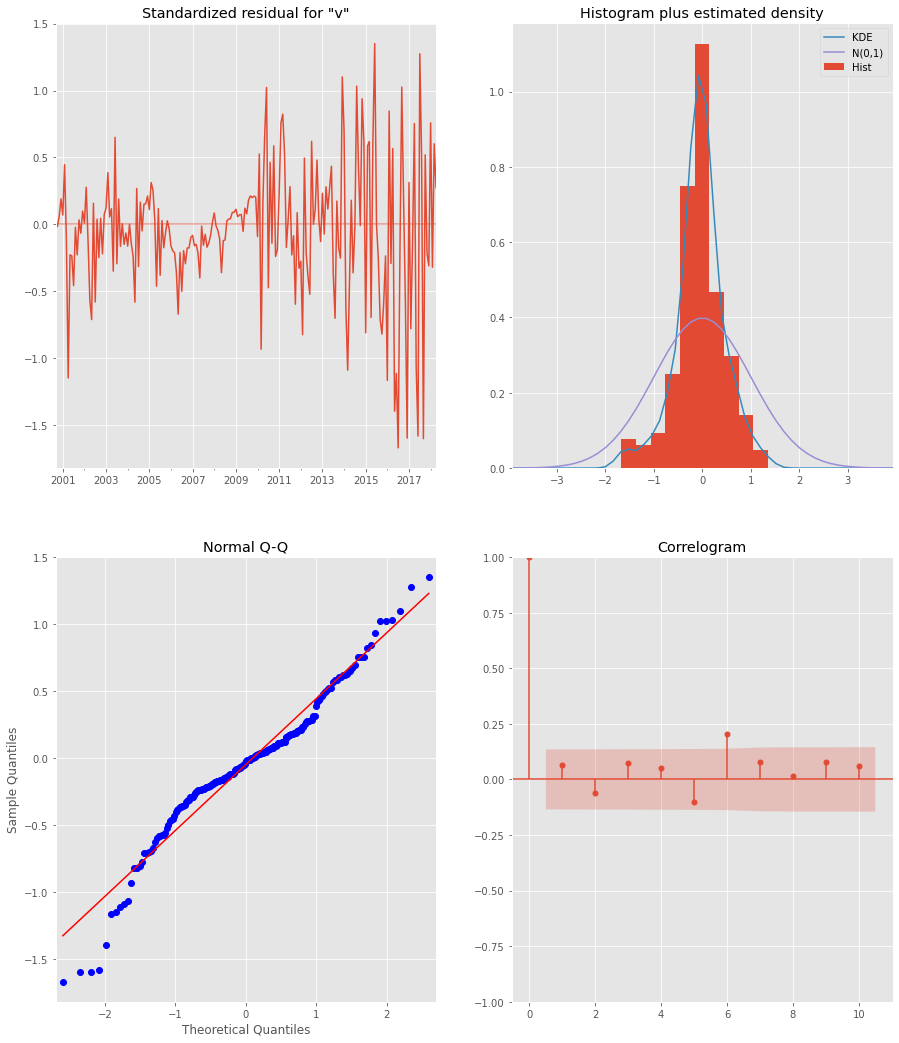

In [107]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

# Step 6: Interpreting Results

In [108]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('1996-04-01'), dynamic=False)
pred_conf = pred.conf_int()

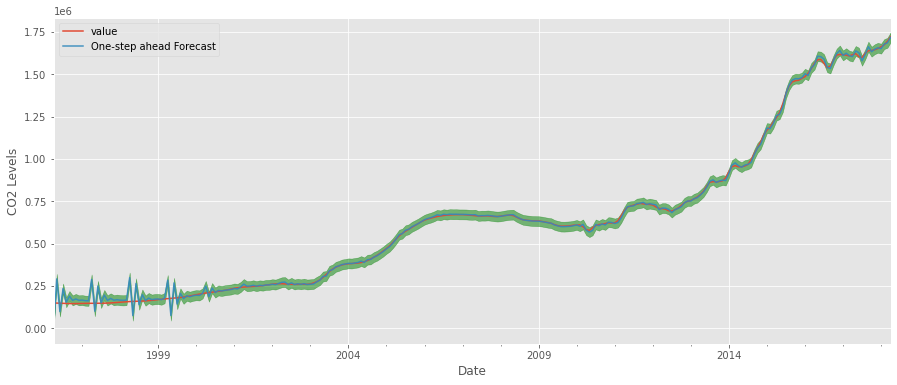

In [109]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = top_zip_percent_melted['1990':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [110]:
# Get the real and predicted values
price_forecasted = pred.predicted_mean
price_truth = top_zip_percent_melted['1996-04-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1996-04-01 00:00:00   NaN
1996-05-01 00:00:00   NaN
1996-06-01 00:00:00   NaN
1996-07-01 00:00:00   NaN
1996-08-01 00:00:00   NaN
                       ..
2018-01-01 00:00:00   NaN
2018-02-01 00:00:00   NaN
2018-03-01 00:00:00   NaN
2018-04-01 00:00:00   NaN
value                 NaN
Length: 266, dtype: float64


In [111]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [ ]:
# Plot the dynamic forecast with confidence intervals as above

#ax = CO2['1990':].plot(label='observed', figsize=(20, 15))
#pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), CO2_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()